In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [9]:
os.chdir("../")

In [10]:
data = pd.read_csv("artifacts/data_ingestion/winequality-red.csv")

In [11]:
print(f'Data shape: {data.shape}')

Data shape: (1599, 12)


In [12]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
print(f'Features: {data.columns}')

Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


**Input Variables**: fixed acidity, volatile acidity, citric acid, residual sugar,
       chlorides, free sulfur dioxide, total sulfur dioxide, density,
       pH, sulphates, alcohol <br>

1) **Fixed acidity** - most acids involved with wine or fixed or nonvolatile (do not evaporate readily) <br>

2) **Volatile acidity** - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste<br>

3) **Citric acid** - found in small quantities, citric acid can add 'freshness' and flavor to wines<br>

4) **Residual sugar** - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet <br>

5) **Chlorides** - the amount of salt in the wine <br>

6) **Free sulfur dioxide** - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine <br>

7) **Total sulfur dioxide** - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine <br>

8) **Density** - the density of water is close to that of water depending on the percent alcohol and sugar content <br>

9) **pH** - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale <br>

10) **Sulphates** - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant <br>


**Output Variable**: Quality

    

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
#Null value count
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
#Numerical Description
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

d:\Anaconda\envs\winequality\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


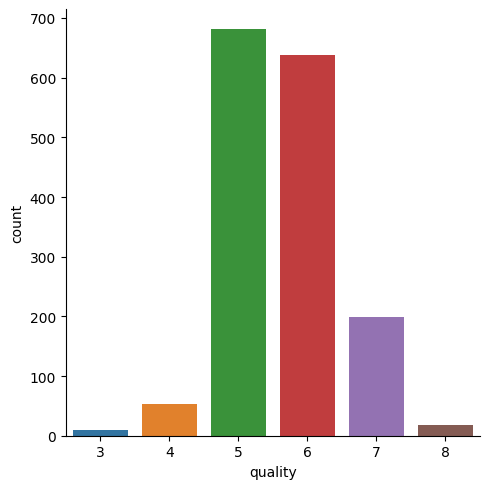

In [23]:
sns.catplot(x='quality',data=data, kind='count',margin_titles=True)

Volatile acidity ~ Quality

<Axes: xlabel='quality', ylabel='volatile acidity'>

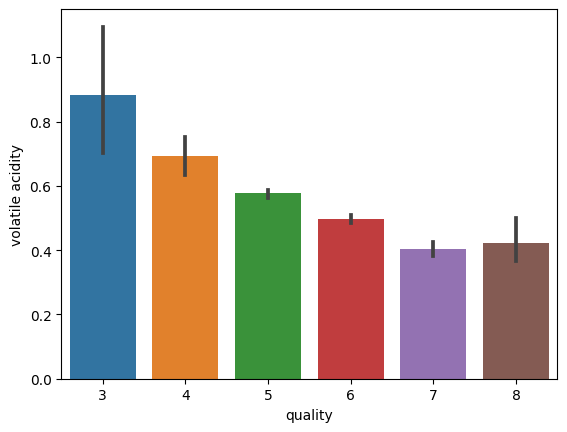

In [26]:
#volatile acidity vs quality
sns.barplot(x="quality",y="volatile acidity",data=data)

If the *volatile acidity* is high -> the *quality* is low

Citric acid ~ Quality

<Axes: xlabel='quality', ylabel='citric acid'>

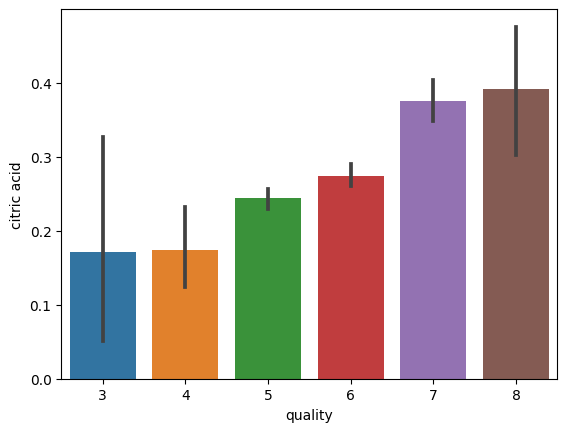

In [33]:
sns.barplot(x="quality",y="citric acid",data=data)

If *citric acid* is high -> the *quality* is high

Residual sugar ~ Quality

<Axes: xlabel='quality', ylabel='residual sugar'>

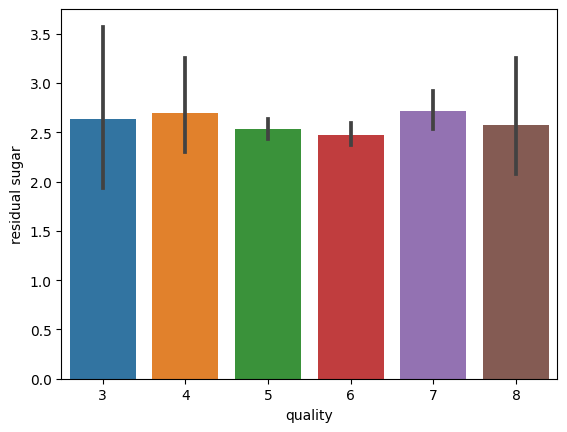

In [35]:
sns.barplot(x="quality",y="residual sugar",data=data)

d:\Anaconda\envs\winequality\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


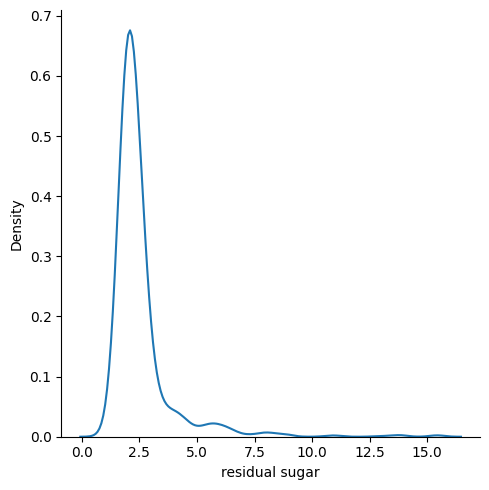

In [36]:
sns.displot(data, x="residual sugar", kind="kde")

In [37]:
data['residual sugar'].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

Chlorides ~ Quality

<Axes: xlabel='quality', ylabel='chlorides'>

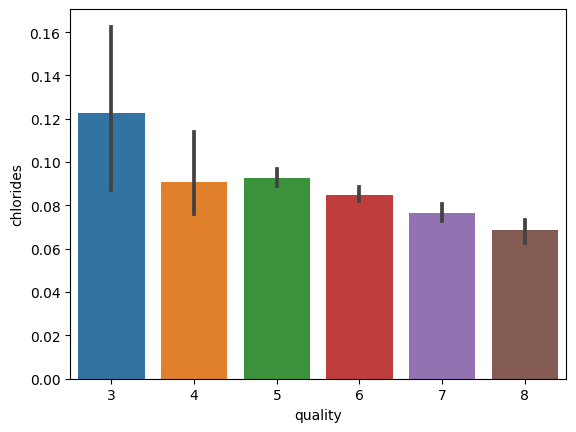

In [38]:
sns.barplot(x="quality",y="chlorides",data=data)

If *chlorides* is high -> the *quality* is low

Free Sulfur dioxide ~ Quality

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

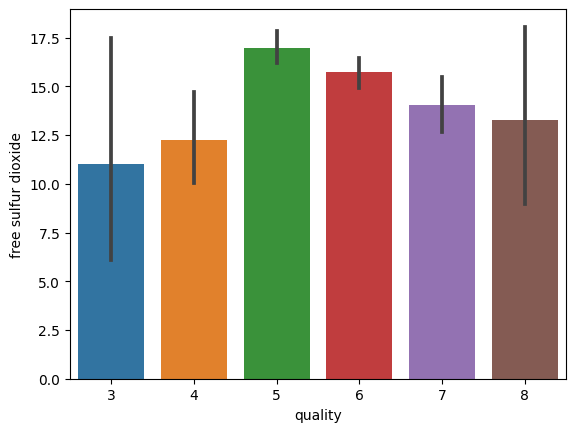

In [41]:
sns.barplot(x="quality",y="free sulfur dioxide",data=data)

Total Sulfur dioxide ~ Quality

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

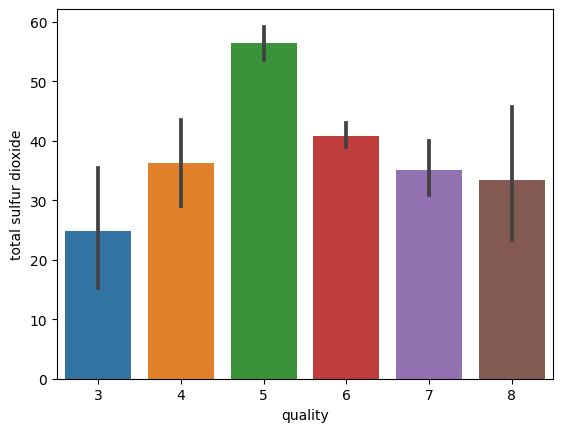

In [43]:
sns.barplot(x="quality",y="total sulfur dioxide",data=data)

Density ~ Quality

<Axes: xlabel='quality', ylabel='density'>

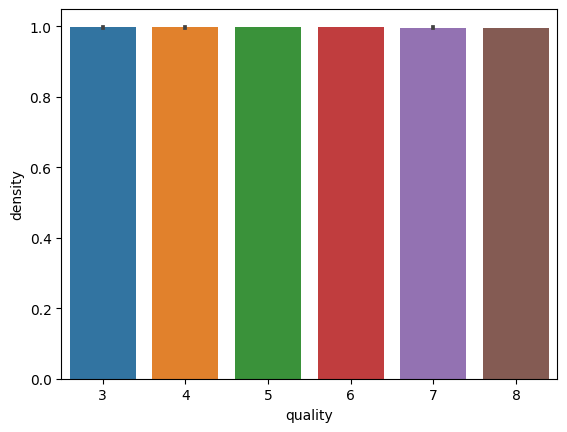

In [44]:
sns.barplot(x="quality",y="density",data=data)

d:\Anaconda\envs\winequality\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


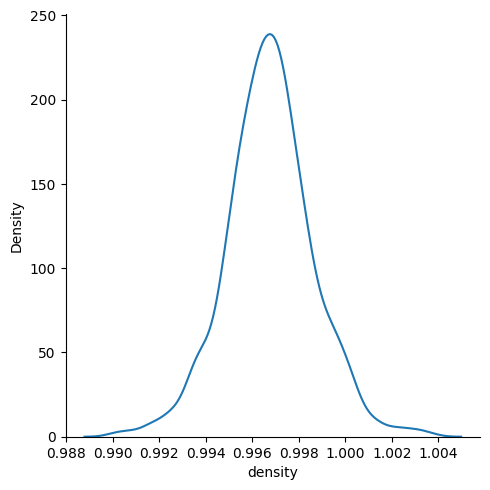

In [48]:
sns.displot(data, x="density", kind="kde")

pH ~ Quality

<Axes: xlabel='quality', ylabel='pH'>

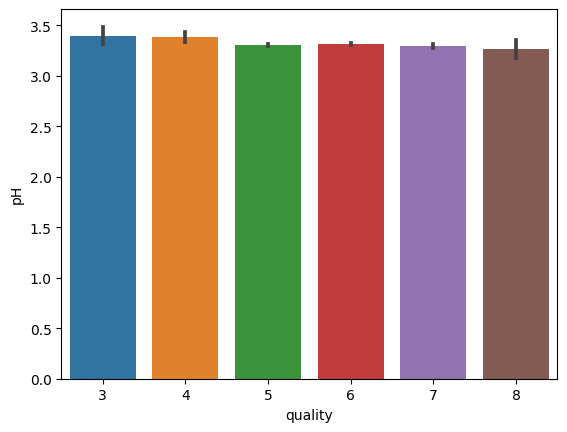

In [50]:
sns.barplot(x="quality",y="pH",data=data)

d:\Anaconda\envs\winequality\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


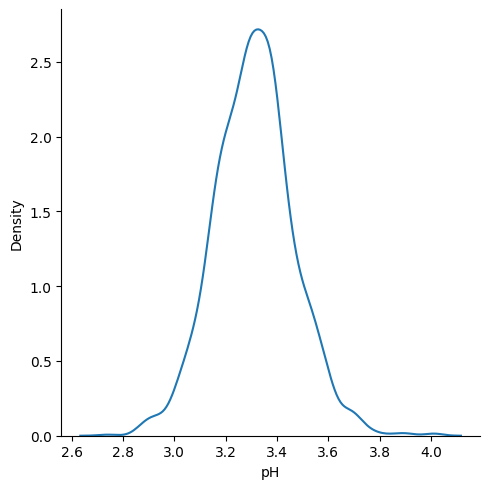

In [51]:
sns.displot(data, x="pH", kind="kde")

Sulphates ~ Quality

<Axes: xlabel='quality', ylabel='sulphates'>

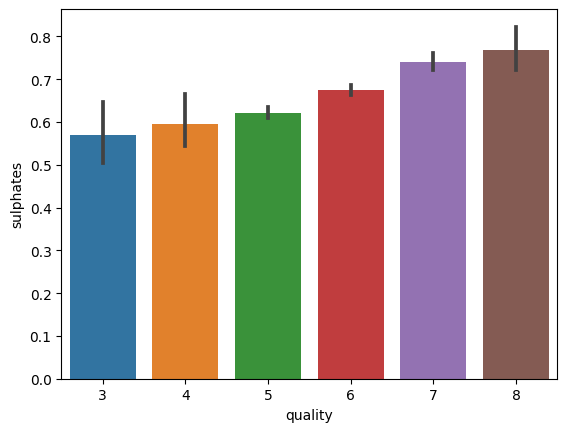

In [52]:
sns.barplot(x="quality",y="sulphates",data=data)

If the *sulphates* value increases, the *Quality* increases 

Alcohol ~ Quality

<Axes: xlabel='quality', ylabel='alcohol'>

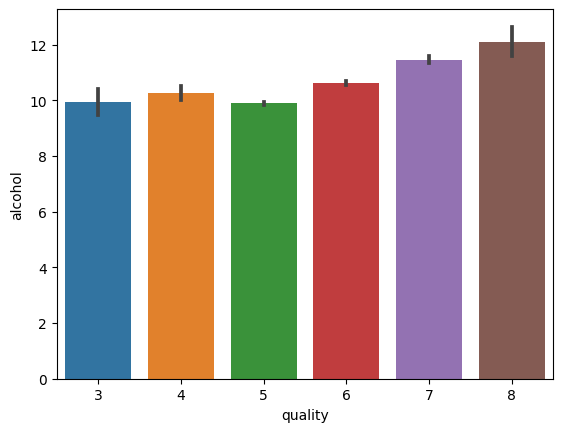

In [53]:
sns.barplot(x="quality",y="alcohol",data=data)

If the *alcohol* value increases slightly, the *Quality* increases 

CORRELATION

In [54]:
corr = data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

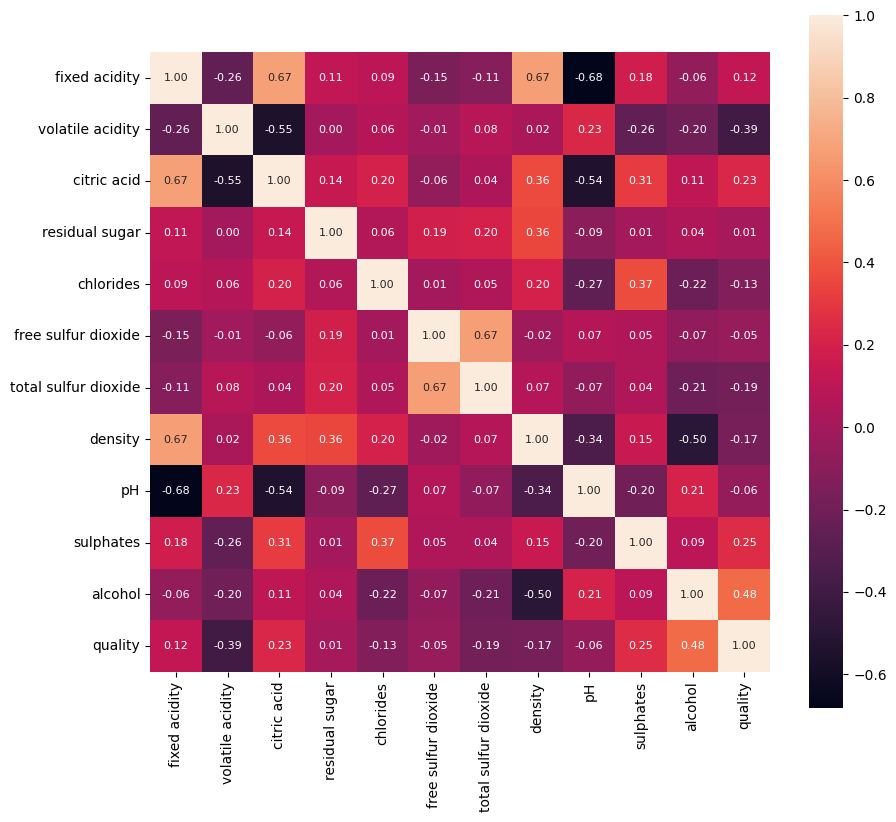

In [55]:
#heatmap
plt.figure(figsize = (10,9))
sns.heatmap(corr,cbar = True,square = True,fmt = ".2f",annot = True,annot_kws={'size':8})

In [58]:
X = data.drop(['quality'], axis=1)
y = data['quality']

In [67]:
X_train, X_test, y_train,y_test = train_test_split(
    X, y, test_size=0.20,random_state=0
)

In [68]:
print(f'Train size: {X_train.shape}')
print(f'Test size: {X_test.shape}')

Train size: (1279, 11)
Test size: (320, 11)


In [69]:
#Linear Regression

mLinearRegression = LinearRegression()
mLinearRegression.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred =mLinearRegression.predict(X_test)
print(f"MSE: {mean_squared_error(y_test,y_pred)}")

MSE: 0.3844711978201246


In [110]:
#ElasticNet
mElasticNet = ElasticNet(alpha=0.2, l1_ratio=0.1)
mElasticNet.fit(X_train, y_train)

ElasticNet(alpha=0.2, l1_ratio=0.1)

In [111]:
y_pred = mElasticNet.predict(X_test)
print(f"MSE: {mean_squared_error(y_test,y_pred)}")

MSE: 0.4118364193197692


In [112]:
r2_score(y_test,y_pred)

0.28058598876928753